# Signaux et espaces vectoriels : baseS canoniqueS temporelleS



Prenonns un ensemble de 3 coordonnées (1, 2, 3) et plongeons les dans une espace vectoriel de base $W$ avec :  

$\vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3} = (1,2,3)_W$


In [110]:
clear all;
close all;
clc;

v = [1; 2; 3]

v =

   1
   2
   3



Elles peuvent représenter différents objets mathématiques d'un espace vectoriel :

- Des matrices 2x2 symétriques
- un polynôme
- un vecteur de l'espace euclidien
- une couleur
- un signal continu
- un signal discret
- ...

Le tout est de chosir une base $(\vec{w_0}, \vec{w_1}, \vec{w_2})$! et de dire :

$\vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3}$

Ainsi pour un espace des matrices 2x2 symétriques

In [111]:
w0=[1 0;
    0 0];
w1=[0 0;
    0 1];
w2=[0 1;
    1 0];
v
Vectv = v(1)*w0 +v(2)*w1 +v(3)*w2 
    

v =

   1
   2
   3

Vectv =

   1   3
   3   2



# $\mathbb{R}^{\mathbb{R}}$ : Espace vectoriel des fonctions $\mathbb{R} \to \mathbb{R}$
Si nous voulons représenter un signal continu à support infini, il faut choisir une base avec des vecteurs de ce type.  
Comme la base se veut temporelle : il faudrait choisir des fonctions localisées (impulsions $p(t)$) autour d'un instant mais qui s'étalent à l'infini.

L'idée est d'utiliser des impulsions temporelles $t\mapsto p(t)$ :
>  $(1,2,3)_W = \vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3} \quad \leftrightarrow \quad  f: t\mapsto 1.p(t) + 2.p(t-1) + 3.p(t-2)\quad $  
>  avec $f(0)=1, f(1) = 2, f(2) = 3$ par exemple 


On peut penser aux fonctions portes, mais aussi aux gaussiennes, sinus cardinal etc.

Ainsi avec des sinus cardinaux et en décidant arbitrairement que la composante 0 est autour de l'instant 0, la une autour de l'instant 1 etc.

Cela donnerait

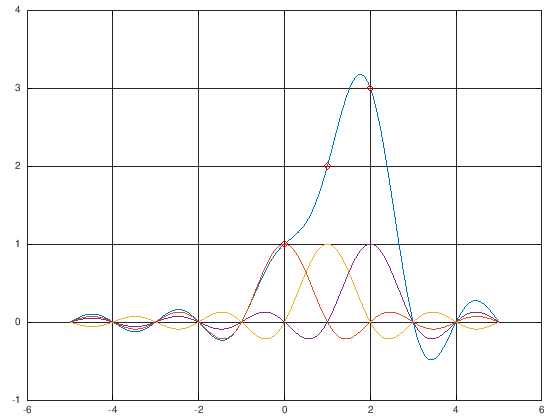

In [112]:
t=-5:0.01:5;    % vecteur temps presque continus ;-)

w0 = sinc(t);
w1 = sinc(t-1);
w2 = sinc(t-2);

Vect_v_sinc = v(1)*w0 +v(2)*w1 +v(3)*w2 ;

plot(t,Vect_v_sinc,t,w0,t,w1,t,w2); hold on; grid on;
plot(0:2,v,'dr')




On voit bien que la dimension 3 de cette base (les vecteurs sont libres) ne représente qu'une sous-ensemble très restreint de l'espace des fonctions qui est de dimension infinie indénombrable.


# $\mathbb{R}^\mathbb{Z}$: Espace vectoriel des suites réelles


Cherchons donc parmis les signaux discrets (échantillonnés), mathématiquement définis comme des suites numériques.

Prenons 3 vecteurs libres de l'espaces des suites entières infinies. Par exemple en discrétisant arbitrairement les sinus cardinaux précédents.
>  $(1,2,3)_W = \vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3}  \quad \leftrightarrow \quad  f: t\mapsto 1.p[k] + 2.p[k-1] + 3.p[k-2]\quad$  
>  avec la suite $(\dots, 1, 2, 3, \dots)$ par exemple 



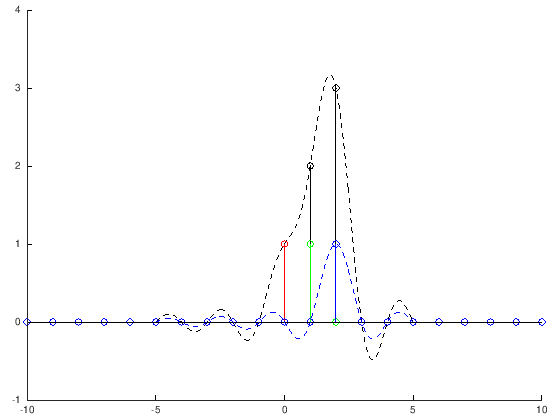

In [113]:
k=-10:1:10;    % vecteur temps discret presque infinis ;-)

w0 = sinc(k);
w1 = sinc(k-1);
w2 = sinc(k-2);

Vectv = v(1)*w0 +v(2)*w1 +v(3)*w2 ;


stem(k,Vectv,'k');hold on;
plot(t,Vect_v_sinc,'k--')


stem(k,w0,'r')
stem(k,w1,'g')
stem(k,w2,'b'); 
plot(t,sinc(t-2),'b--')


Et oui ! En échantillonant à la période des sinus cardinaux on obtient un vecteur de base temporel qui est l'impulsion unité (qui est au discret ce que l'impulsion de Dirac est au continu)

> Définissons la **fonction impulsion unité**  
>$\delta_0 : \mathbb{N} \to \mathbb{R}$ parfois $\mathbb{C}$  
>$\quad k \mapsto \begin{cases} 1 & \text{ si } k = 0 \\ 0 & \text{ sinon}\end{cases}$  
>  
> Et l'impulsion centrée en $a$ :
> $\delta_a : k \mapsto \delta_0[k-a]=\begin{cases} 1 & \text{ si } k = a \\ 0 & \text{ sinon}\end{cases}$



# Prolongement dans $\mathbb{R}^N_b$ : suites réelle à support borné

Le prolongement borné consiste à utiliser des impulsions à durée finie (nulles pour $|n|>N_0$). Le prolongement est alors :

>  $(1,2,3)_W = \vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3}  \quad \leftrightarrow \quad  f: t\mapsto 1.p[k] + 2.p[k-1] + 3.p[k-2]\quad \; | \;k\notin[\![0; N [\![ \implies f[k]=0$   
>  avec la suite $(\dots, 0, 1, 2, 3, 0, \dots)$ par exemple 


Les suites réelles infinies ne sont pas manipulable dans le cas pratique, nous allons considérer une fenêtre d'observation.
> Soit la **fonction porte** ou **fenêtre naturelle**  de largeur N :  
> $\Pi_N : k \mapsto  \left\{ \;\begin{array}{ll} 1 & \text{ si } 0 \leq k < N \\ 0 & \text{sinon}\end{array}\right.$


On peut ainsi définir l'espace des suites réelles et différents sous espaces vectoriels à support fini de N échantillons :
> **Suite réelle à support borné de N échantillons:**  
> $\mathbb{R}^N_b = \mathbb{R}^{[\![0\,;N [\![} = \left(u_k . \Pi_N[k]\right)_{k\in\mathbb{Z}}$  
> Autrement dit "l'ensemble des suites réelles multipliées par une fenêtre d'observation de N échantillons"


On obtient ainsi des  sous-espaces vectoriels (s.e.v.) de $\mathbb{R}^{\mathbb{Z}}$  que nous notons donc :
>  $(u_k)_{k\in\mathbb{Z}}\quad$ noté $\mathbb{R}^{\mathbb{Z}}\quad$ : l'**espace des suites réelles**  
>  $(u_k)_{k\in\mathbb{N}}\quad$ noté $\mathbb{R}^{\mathbb{N}}\quad\subset\mathbb{R}^{\mathbb{Z}}$ : l'**espace des suites réelles causales** (nulles pour $k<0$)   
>  $\left(u_k . \Pi_N[k]\right)_{k\in\mathbb{Z}}$ noté $\mathbb{R}^{[\![0 \:;\; N [\![}$ parfois $\mathbb{R}^N_B \subset\mathbb{R}^{\mathbb{N}}\subset\mathbb{R}^{\mathbb{Z}}$ : l'**espace des suites réelles à support finit de longueur N** 

Pour obtenir une base de $\mathbb{R}^3_B$ on utilise **les impulsions unités**

% La fonction delta est VECTORISEE : 
%    k peut être une matrice de valeurs
function [v] = delta_0(k)
    [Nrang,Ncol] = size(k);   
    v = zeros(Nrang, Ncol);
    for rang_k = 1:Nrang
        for col_k = 1:Ncol
                if k(rang_k,col_k) == 0
                    v(rang_k,col_k)=1;
                end                 
        end % boucle sur colonne de k
    end % boucle sur rangée de k
end 

w0 = delta_0(k);    % w0 matrice rangée (1,21)
w1 = delta_0(k-1);  % w1,w2  idem mais
w2 = delta_0(k-2);  %  avec le 1 pour k-1 = 0 etc. 

Vectv = v(1)*w0 +v(2)*w1 +v(3)*w2 ; % Somme de matrices (1,21)

subplot(4,1,1); stem(k,v(1)*w0,'r') %1.w0 composante rouge
subplot(4,1,2); stem(k,v(2)*w1,'g') %2.w1 composante verte
subplot(4,1,3); stem(k,v(3)*w2,'b')      %3.w2 composante bleue
subplot(4,1,4); 
stem(k,Vectv,'k');  % somme des composantes noire

## Isomorphisme (bijection) avec un sous espace des suites

Remarquez que l'on vient de prolonger le vecteur $\vec{v}\in\mathbb{R}^3$ avec des $0$ pour se plonger dans un sous espace vectoriel des suites réelles $(u_n)_{n\in\mathbb{Z}}$ noté $\mathbb{R}^{\mathbb{Z}}$.



On peut faire une bijection entre un vecteur de $\vec{v}\in\mathbb{R}^3$ (de dimention 3) avec une suite observable de $\mathbb{R}^3_b$ qui est un s.e.v. de dimension 3 de l'espace des suites réels.

$\vec{v}=(1,2,3)_{B_3}=1.e_1 + 2.e_2 + 3.e_3 = \begin{array}{lll} &1. &(1,0,0)\\ +& 2.&(0,1,0)\\ + &3.&(0,0,1) \end{array}= \left[\begin{array}{c}1 \\2\\3 \end{array}\right]_{B_3} \leftrightarrow  \left[\begin{array}{c}1 \\2\\3 \end{array}\right]_{B_3^b} = \begin{array}{lll} & 1. &(\dots, 1, 0,0,\dots)\\ +& 2.&(\dots, 0, 1,0,\dots) \\ +& 3.&(\dots, 0, 0, 1,\dots)\end{array}=1.\delta_0 + 2.\delta_1 + 3.\delta_2$

Les espaces étant isomorphiques, on assosiera et notera indiféremment la base temporelle $B_3^b$ et la base euclidienne $B_3$.


Nous définissons donc les bases canoniques de ces espaces :


>  $B_{\mathbb{Z}} = \left( \delta_k \right)_{k\in\mathbb{Z}}\quad$ avec $\mathbb{R}^{\mathbb{Z}} = \mathop{vect}\left(B_{\mathbb{Z}}\right)$  
>  $B_{\mathbb{N}} = \left( \delta_k \right)_{k\in\mathbb{N}}\quad$ avec $\mathbb{R}^{\mathbb{N}} = \mathop{vect}\left(B_{\mathbb{N}}\right)$  
>  $B_N^b = \left( \delta_k \right)_{k\in[\![0 \:;\; N [\![}\quad$ avec $\mathbb{R}^N_b = \mathop{vect}\left(B_N^b\right)$ où le "b" signifie "support Borné" 


Numériquement, nous pouvons définir les matrices de passsages entre ces bases en prenant pour   $\mathbb{R}^{\mathbb{Z}}$ un nombre de point plus grand que 3 : 

**inutile et impossible de représenter un signal sur un support infini!**

In [115]:
function v = delta(t)
    v = (t==0); % vrai = 1, faux = 0
end 
%% t == 0 se fait pour chacun des éléments de t !
%% t peut être une matrice : c'est la VECTORISATION

%% On prend un support de z infini ou presque (R^8)
k= transpose(-1:7); % temps de Bz en colonnes

%% On donne les coordonnées de w0 à w2 dans la base
w0 = delta(k);    % maintenant en colonnes
w1 = delta(k-1); 
w2 = delta(k-2); 

%% La matrice de passage consiste à lister en colonne
% les vecteur de la base delta_n
M_Bz_B3b = [w0, w1, w2] % Matrice de colonnes

%%Ainsi notre vecteur dans la base Bz s'obtient en
%% multipliant les 3 coordonnées par la matrice de passage
v_B3b = M_Bz_B3b * v

M_Bz_B3b =

  0  0  0
  1  0  0
  0  1  0
  0  0  1
  0  0  0
  0  0  0
  0  0  0
  0  0  0
  0  0  0

v_B3b =

   0
   1
   2
   3
   0
   0
   0
   0
   0



## Base orthogonale

Nous pouvons vérifier que cette base ($w_0$, $w_1$, $w_2$) de suite réelles est bien orthogonale et normée. Pour cela il faut effecteur tout les produits scalaires et vérifier :

- $<w_k, w_l> = 0$ si $k\neq l$
- $<w_k, w_k> = \|w_k\|^2 = 1 $

Remarquons que nous n'avons pas défini le produit scalaire entre suite numériques, mais comme nous avons une base $B_N^b$ on sait que l'on peut l'obtenir en multipliant à gauche un vecteur par sa transposée : 

$ <w_k, w_l> = {}^T\!w_k|_{B_N^b} \,.\, w_l|_{B_N^b}$

En prenant la matrice des vecteur colonnes,  qui est la matrice de passage $M = M_{B_3^b\leftarrow B_3} = \left[ w_k|_{B_3^b}\right]_{0\leq k < 3}$, et en la transposant : on obtient la matrice de tous vecteur transposés ${}^T\!M = \left[{}^T\!w_k|_{B_3^b}\right]_{0\leq k < 3}$. On peut donc calculer tous les produit scalaire en multipliant ce sdeux matrices :

${}^T\!M.M = \left( <w_j,w_k>\right)_{(j,k)\in[\![0 ; 3[\![^2} = I_d$


In [116]:
%% Fonctions anonymes ou fonctions "lambda"
% @(t) (t==0)   
% est une fonction d'un parametre t "déclarée à la volée"
delta = @(t) (t==0);  % on appelle fa fonction anonyme "delta"

%% Broadcast de variable (pas de français connus)
% Si une dimention manque à une variable, elle est 
% ajoutée en complétant "intelligemment"...
k = transpose(-1:7); % matrice colonne (8,1)
j = 0:2;  % matrice ligne (1,3)
M = k-j;
% l'expression k-j de type (8,1)-(1,3) non définie en maths
% alors 
% la colonne k (8,1) est recopiée sur 3 colonnes => (8,3)
% la rangée  j (3,1) est recopiée sur 8 rangées  => (8,3)
% la soustraction matricielle (8,3) peut se faire par BROADCAST

% par fonction anonyme vectorisée du broadcast de k-j 
M_Bz_B3b = delta(k-j) 
transpose(M_Bz_B3b)
transpose(M_Bz_B3b) * M_Bz_B3b



M_Bz_B3b =

  0  0  0
  1  0  0
  0  1  0
  0  0  1
  0  0  0
  0  0  0
  0  0  0
  0  0  0
  0  0  0

ans =

  0  1  0  0  0  0  0  0  0
  0  0  1  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0

ans =

   1   0   0
   0   1   0
   0   0   1



La base est bien orthonormée et donc les matrices de passages orthogonales car :
* orthogonaux car les élément hors diagonale ($j\neq k$) sont les produits scalaires et sont nuls
* normés car les éléments diagonaux ($j=k$) sont la norme de chaque vecteurs et vallent 1 

Les matrices de passage ne sont pas rectangle car la dimention des espaces est différente (l'un est de dimention infinie dénombrable et l'autre de dimantion 3).

> La TFSD (transformée de Fourier des Signaux Discret) est  
> le passage dans une base fréquencielle complexe de la base temporelle de $\mathbb{R}^{\mathbb{Z}}$

## Projection (échantillonnage) de la base $\mathbb{R}^\mathbb{Z}$ dans $\mathbb{R}_3^b$

Si l'on prend un vecteur $\vec{f}\in\mathbb{R}^\mathbb{Z}$ (donc une suite réelle à support infini), on peut la projeter (ou décomposer dans l'espace des suite de 3 points : $\mathbb{R}_3^b$).


Comme la base est une base orthonormée (b.o.n.) la projection est simplement :

$\mathop{proj}_{/B_3^b}(\vec{f}) = \left[\begin{array}{l} <\vec{f},\vec{w_0}> \\ <\vec{f},\vec{w_1}>\\<\vec{f},\vec{w_2}>\end{array}\right]_{B_3^b} = \left[\begin{array}{l} <\vec{w_0},\vec{f}> \\ <\vec{w_1},\vec{f}>\\<\vec{w_2},\vec{f}>\end{array}\right]_{B_3^b} = \left[\begin{array}{l} {}^T\!{w_0|}_{B_Z}.g|_{B_Z}\\ {}^T\!{w_1|}_{B_Z}.g|_{B_Z}\\{}^T\!{w_2|}_{B_Z}.g|_{B_Z}\end{array}\right]_{B_3^b}= \underbrace{\left[\begin{array}{l} {}^T\!{w_0|}_{B_Z} \\ {}^T\!{w_1|}_{B_Z}\\ ^T\!{w_2|}_{B_Z}\end{array}\right]}_{M_{B_3^b\leftarrow B_Z}}.g|_{B_Z}=\underbrace{{\begin{array}{l} { }\\ {}  \\ { } \end{array}}^T\!\left[\begin{array}{l} {w_0|}_{B_Z} \\ {w_1|}_{B_Z}\\ {w_2|}_{B_Z}\end{array}\right]}_{{}^T\!M_{B_Z\leftarrow B_3^b}}.g|_{B_Z} $

En utilisant les coordonnées pour calculer les produits scalaires matriciellement on obtient:

$\mathop{proj}_{/B_3^b}(\vec{f})|_{B_3^b} = M_{B_3^b\leftarrow B_Z} . \vec{f}|_{B_Z} = {}^T\!M_{B_Z\leftarrow B_3^b} . \vec{f}|_{B_Z}$


On en déduit ainsi les produits scalaires que l'on peut associer aux deux espaces $\mathbb{R}^\mathbb{Z}$ dans $\mathbb{R}^3_b$ :

* Dans $\mathbb{R}^\mathbb{Z}$ on note le produit scalaire $<\!< f, g>\!> = \sum\limits_{k\in\mathbb{Z}}f[k].g[k]$
* Dans $\mathbb{R}^N_b$ on note le produit scalaire $<\!< f, g>\!>_p = \sum\limits_{0 \leq k < N}f[k].g[k]$

Où l'on note $f[k]$ le terme de rang $k$ d'une suite $(f_k)=(f[k])$.


norme_erreur =  70.271


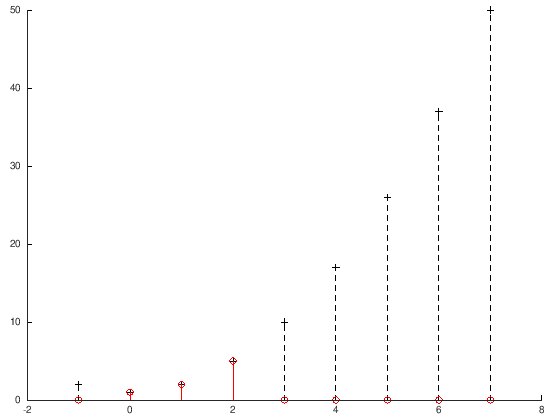

In [117]:
%% prenont la fonction t^2+1 échantillonnée dans Bz
f_Bz = k.^2 + 1;

%% Projetons sur B3b: on note p_f la projectio nde f
p_f_B3b = transpose(M_Bz_B3b) * f_Bz;

%% Revenons dans la base de départ (recomposition)
p_f_Bz = M_Bz_B3b * p_f_B3b ; 

%% On regarde la norme de l'erreur pour voir 
%% pour voir s'il manque du signal 

err_pf_Bz = (f_Bz - p_f_Bz);
norme_erreur = sqrt(transpose(err_pf_Bz)*err_pf_Bz)

%% Affichons ces signaux
stem(k,f_Bz,'k--+');hold on;
stem(k,p_f_Bz,'r')

On voit bien que $\vec{f}$ est différent de sa projection $\mathop{proj}_{B_3^b}(\vec{f})$ sur l'espace des suites de 3 points.


On vera que l'on peut trouver une b.o.n de l'espace des suite de 3 points qui soit basée sur les fréquences et non plus sur le temps.

> changer de base dans $\mathbb{R}^N_b$ avec une base fréquencielle sera  
>  effectuer une TFSD (Transformée de Fourier des Signaux Discrets)

# Prolongement dans $\mathbb{R}^N_p$ : suite réelles de prériode N

Le prolongement périodique consiste à utiliser des impulsions $p$ qui soient N-périodiques.

Le prolongement est alors :
>  $(1,2,3)_W = \vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3}  \quad \leftrightarrow \quad  f: t\mapsto 1.p[k] + 2.p[k-1] + 3.p[k-2]\quad \; | \;\forall k, f[k]=f[k+N]$   
>  avec la suite $(\dots, 1, 2, 3,\, 1, 2, 3,\, 1, 2, 3,\dots)$ par exemple 




Dans ce cas il faut prendre des vecteurs de la base qui soient de période 3 et localisé dans le temps. On construit alors simplement une version périodique des vecteurs de $\delta_j$. 

> On définit alors un signal appelé **peigne d'impulsions** de période N  
> noté $I\!I\!I_N$ (letrre cyrilique Sha) défini par :  
> $I\!I\!I_N := \sum\limits_{j\in\mathbb{Z}}  \delta_{jN} : k \mapsto \delta_0[k\mod{}N]\quad$ 

On définit donc 
> le s.e.v. des **suites réelles de période N** et sa base comme :  
>  $(u_k = u[k \mod N ])_{k\in\mathbb{Z}}\quad$ noté $\mathbb{R}^{[\![0 \:;\; N [\![_P}\quad\notin\mathbb{R}^{\mathbb{N}}\quad\subset\mathbb{R}^{\mathbb{Z}}$ : l'**espace des suites réelles de période N**  
> $B_N^p = \left(k\mapsto I\!I\!I_N[k - j]\right)_{j\in\mathbb{Z}}$ et donc $\mathbb{R}^{[\![0 \:;\; N [\![_P} = \mathop{vec}(B_N^p)$

Numériquement traçons les vecteurs de $B_3^P$ dans une base relativement proche de $B_Z$

Ainsi $\mathbb{R}^3$ est isomorphe à $\mathbb{R}^3_p$ qui est un s.e.v de $\mathbb{R}^{\mathbb{Z}}$.
Donc pour le vecteur v :

$ v \in \mathbb{R}^3 \leftrightarrow  v|_{B_3^p} \in \mathbb{R}^3_b $


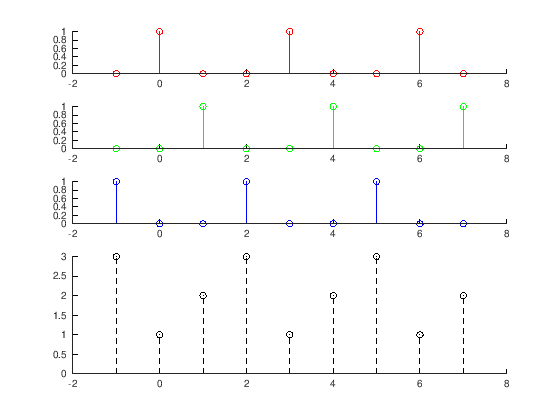

In [118]:
%% Fonction anonyme "peigne" Vectorisée à 2 variables
peigne = @(k, N) delta(mod(k,N));
% Si k est matrice mais N vecteur ou scalaire : 
% il y aura broadcast de N

% Broadcast de k-j en matrice (k,j)
M_Bz_B3p = peigne(k-j,3);
%  _______________________\ j
% |                       /
% |  w0_Bz  w1_Bz  w2_Bz
% |
%\|/
% k

w0_Bz = M_Bz_B3p(:,1);
w1_Bz = M_Bz_B3p(:,2);
w2_Bz = M_Bz_B3p(:,3);

couleurs=['r';'g';'b'];
for id_j=1:3
    subplot(5,1,id_j)
    stem(k,M_Bz_B3p(:,id_j),couleurs(id_j));
end

v_Bz = M_Bz_B3p * v ;

subplot(5,1,[4 5])
stem(k,v_Bz,'k--')

Essayez donc cette astuce pour modifier la base et avoir une base 3-périodique

Ce prolongement périodique est pratique si l'on utilise une base fréquentielle, car comme pour les séries de Fourier si le signal est sur un support périodique de période $T_0$, alors seules les fréquences multiples de $F_0$ seront utiles. On 
obtiendra ainsi : 

> la Transformée de Fourier Discrète (TFD, où FFT est un algorithme de TFD efficace)  
> est le passage dans une base fréquentielle (complexe) de la base temporelle $B_3^p$ de $\mathbb{R}^3_p$


Cette base périodique est donc utile, mais la construction arbitraire de cette période peut ajouter des discontinuités à chaque changement de période (hautes fréquences dans la transformée) et le fait que la fonction ne soit pas paire nécessite de décomposer en cosinus et sinus (a(n), b(n), $n\geq0$) ou en ondes complexes (c(n), $n\in\mathbb{Z}$) avec des fréquences négatives.

Sauriez vous donner un prolongement en suites **paires** périodiques (il faut changer la période) de dimension 3 ?


# Prolongement dans $\mathbb{R}^{N}_{DCT-II}$ : suite paires périodiques 

Contrairement au continu où il existe un prolongement périodiques pair possible, en discret il existe plusieurs solutions. 

Le plus poulaire est de période $2N$ et donne :
>  $(1,2,3)_W = \vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3}  \quad \leftrightarrow \quad  f: t\mapsto 1.p[k] + 2.p[k-1] + 3.p[k-2]\quad \; | \;\forall k, f[k]=f[k+2N]$ et $f[k]=f[-k-1]$  
>  avec la suite $(\dots,\, 3, 2, 1,\; 1, 2, 3, 3, 2, 1, \; 1, 2, 3,\,\dots)$ par exemple   
>  **Il y a un déclage temporel !** car l'indice $k=0$ ne correspond pas au temps 0. On est quasi-pair car $f[k]=f[-k-1]$ et non $f[-k]$.



En continu, le développement en série de cosinus (CT pour Cosine Transform) est facile à définir car :  
> il y n'y a qu'un seul prolongement pair de période double d'un signal à support borné $[0 ; T_0[$. 
> C'est donc une version réelle des SdF $c(n)$ où l'on prend une période double avec :  
> $CT[n] = a(\frac{n}{2}) = \int\limits_0^{T_0} f(t) . \cos\left(2\pi n \frac{t}{2.T_0}\right) dt$

**Il n'y a pas de $b(n)$ ! et tout est réel, en revanche la résolution fréquentielle est double :  $n\leftrightarrow \frac{F_0}{2}$**

En discret pour prolonger la suite bornée (a,b,c), il y a deux choix à faire à chaque borne :
* a est à l'instant $0$ et donc non répété : ...b,a,b,...
* a est répété et donc à l'instant $\frac{T_e}{2}$ : ..., b, a, a, b
* d est non répété et donc à $(N-1).T_e$ de l'échantillon a : ..., c, d, c 
* d est répété et donc à l'instant $(N-1).T_e + \frac{T_e}{2}$ de a : ..., b, a, a, b

> en discret il y a 4 prolongements pairs donnant 4 **Direct Cosine Transform** DCT  
> car il y a 4 prolongements pairs "aux deux bornes" conduisant à 4 espaces pairs périodiques,
> et 4 prolongement pair en "a" et impair en "b"


Type de DCT | Prolongement (N=4)         | Décalage de "a" | parité en "b" | Période  
-----|----------------------------|-----------------|---------------|--------
Type-I | (a, b, c, b)       |         0       | pair          | 2.(N-1)   
Type-II | (a, b, c, c, b, a) |        +1/2     | pair          | 2.N   

Le type II est très utilisé pour compresser les signaux (mp3, avi, etc.) 
Donnons-en la base temporelle.


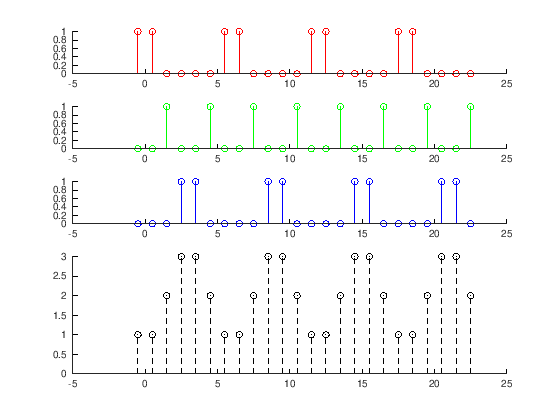

In [119]:
decal = 1/2;
N = 3;  % 3 points
j = (1:N) - decal;
k = (0:8*N-1)' - decal;
periode = 2*N;

M_Bz_Bdct = peigne(k-j,periode) + ...
            peigne(k-(periode-j),periode) ;


for id_j=1:N
    subplot(5,1,id_j); stem(k,M_Bz_Bdct(:,id_j),couleurs(id_j))
end

v_Bz = M_Bz_Bdct * v;
subplot(5,1,[4 5]); 
stem(k,v_Bz,'k--');


Ce prolongement pair et périodique va permettre de décomposer le signal uniquement en cosisnus (a(n)) mais avec une résolution fréquentielle double, car la période est double.

La base est clairement orthogonale (orthogonalité dans le temps : jamais non nul en même temps) par contre la norme au carré de chaque vecteur vaut le nombre d'impulsions dans le temps. Dans une base de temps infinie, ce signal est de norme infinie, car d'énergie infinie puisque périodique. On devrait plutôt parler de puissance moyenne et sommer que sur une période :


> Dans $\mathbb{R}^{\mathbb{Z}}$ avec le produits scalaire $<\!<f,g>\!>=\sum_{k\in\mathbb{Z}} f[k].g[k]$ donne l'énergie !   
> Dans $\mathbb{R}^N_p$ avec le produits scalaire $<\!<f,g>\!>_p=\sum_{0\leq k < N} f[k].g[k]$ donne l'énergie sur une période. 
> Dans $\mathbb{R}^N_p$ avec le produits scalaire $<\!<f,g>\!>_p=\frac{1}{N}\sum_{0\leq k < N} f[k].g[k]$ donne la puissance moyenne.  



In [120]:
scal = @(u,v,N) transpose(v)*u;
scalp = @(u,v,N) transpose(v(1:N,:))*u(1:N,:);
scalpn = @(u,v,N) transpose(v(1:N,:))*u(1:N,:)/N;

scal(M_Bz_Bdct,M_Bz_Bdct)
scalp(M_Bz_Bdct,M_Bz_Bdct,2*N)
scalpn(M_Bz_Bdct,M_Bz_Bdct,2*N)

ans =

   8   0   0
   0   8   0
   0   0   8

ans =

   2   0   0
   0   2   0
   0   0   2

ans =

   0.33333   0.00000   0.00000
   0.00000   0.33333   0.00000
   0.00000   0.00000   0.33333



On voit que les vecteurs de base  sont orthogonaux et de même norme mais pas de norme 1.

Cela veut dire que le vecteur v de norme 5



# Prolongement dans $\mathbb{R}^{N}_{DCT-I}$ : suite paires périodiques (superpositions)

Pour obtenir un décalage pair centré en $t=0$, il faut raccourcir la période à $2(N-1) et superposer les signaux:

>  $(1,2,3)_W = \vec{v} = 1.\vec{w_0} + 2.\vec{w_1} + 3.\vec{w_3}  \quad \leftrightarrow \quad  f: t\mapsto 1.p[k] + 2.p[k-1] + 3.p[k-2]\quad \; | \;\forall k, f[k]=f[k+2(N-1)]$ et $f[k]=f[-k]$  
>  avec la suite $(\dots,\, 3, 2,\; 1, 2, 3, 2, \; 1, 2, 3,\,\dots)$ par exemple   
> **Pas de décalage temporel mais la période est $2.(N-1)$** car on superpose les extrémités




Dans les types de prolongement donnés


Type de DCT | Prolongement (N=4)         | Décalage de "a" | parité en "b" | Période  
-----|----------------------------|-----------------|---------------|--------
Type-I | (a, b, c, b)       |         0       | pair          | 2.(N-1)   
Type-II | (a, b, c, c, b, a) |        +1/2     | pair          | 2.N   

Le type I nécessite de normer les vecteurs 

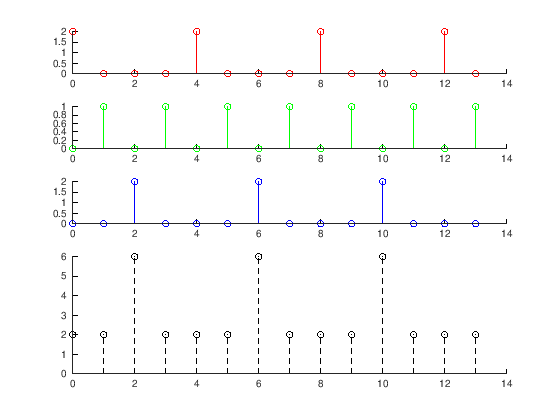

In [121]:
decal = 0;
N = 3;  % 3 points
j = (0:(N-1)) - decal;
k = (0:7*(N-1)-1)' - decal;
periode = 2*(N-1);

M_Bz_BdctI = peigne(k-j,periode) + ...
            peigne(k-(periode-j),periode) ;


for id_j=1:N
    subplot(5,1,id_j); stem(k,M_Bz_BdctI(:,id_j),couleurs(id_j))
end

v_Bz = M_Bz_BdctI * v;
subplot(5,1,[4 5]); 
stem(k,v_Bz,'k--');


Ce prolongement de période "trop courte" recouvre la borne a et c :

=  | 2c| b | 2a | b | 2c |  b | 2a | b
---|---|---|---|---|---|---|---|---
  +|---|---|---|---|---|---|---|---
  +| c | b | a | 0 | 0 | 0 | 0 | 0 
  +| 0 |0  | a | b | c | 0 | 0 | 0 
  +| 0 |0  | 0 | 0 | c | b | a | 0 
  +| 0 |0  | 0 | 0 | 0 | 0 | a | b 
  +|---|---|---|---|---|---|---|---

Le "a" est doublé et le "c" aussi car ainsi :
- la base temporelle ...(2,0,0,0)... de a
- la base temporelle ...(0,0,2,0)... de c
- celles aux milieux ...(0,1,0,1)... de b

sont pas de même normes !


normes =

   2.0000   1.4142   2.0000

correction =

   0.50000   1.00000   0.50000

normes =

   1.0000   1.4142   1.0000



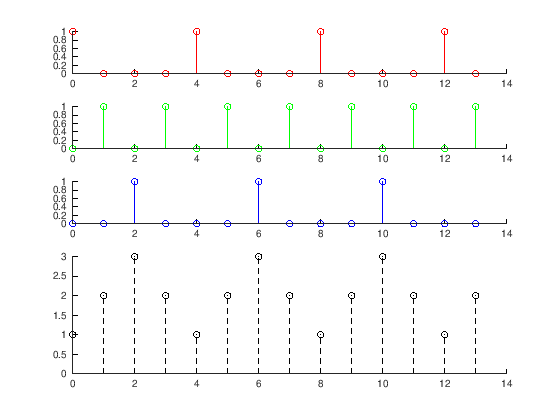

In [122]:
scalaires = scalp(M_Bz_BdctI,M_Bz_BdctI,2*(N-1));
normes  = sqrt(sum(scalaires))
correction = [0.5 1 0.5]
% broadcast rangées
M_Bz_BdctI = M_Bz_BdctI .* (correction);

scalaires = scalp(M_Bz_BdctI,M_Bz_BdctI,2*(N-1));
normes  = sqrt(sum(scalaires))

for id_j=1:N
    subplot(5,1,id_j); stem(k,M_Bz_BdctI(:,id_j),couleurs(id_j))
end
v_Bz = M_Bz_BdctI * v;
subplot(5,1,[4 5]); 
stem(k,v_Bz,'k--');


Toujours pas de même norme !

Dans le passage à une base  fréquentielle il faudra traiter les points bornes à part ! 

Alors que si nous normons et acceptons de déformer un peu le signal, nous aurons une dct facile...



normes =

   1.0000   1.4142   1.0000

correction =

   1.00000   0.70711   1.00000

normes =

   1.00000   1.00000   1.00000



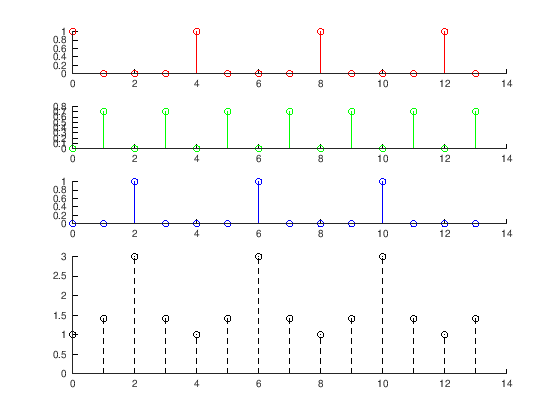

In [123]:
scalaires = scalp(M_Bz_BdctI,M_Bz_BdctI,2*(N-1));
normes  = sqrt(sum(scalaires))
correction = 1./normes
% broadcast rangées
M_Bz_BdctI = M_Bz_BdctI .* (correction);

scalaires = scalp(M_Bz_BdctI,M_Bz_BdctI,2*(N-1));
normes  = sqrt(sum(scalaires))

for id_j=1:N
    subplot(5,1,id_j); stem(k,M_Bz_BdctI(:,id_j),couleurs(id_j))
end
v_Bz = M_Bz_BdctI * v;
subplot(5,1,[4 5]); 
stem(k,v_Bz,'k--');
